# Proposal Analysis
This step completes the prior steps undertaken in analyzing the generated and processed model responses in differing perturbation settings.

## Gemini Analysis

In [ ]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import numpy as np
import scipy as sci

# load preprocessed test interviews
test_interviews_processed = pd.read_csv("../assets/test_interviews/test_interviews_processed.csv", sep=";")

In [ ]:
# Gemini Test Interviews
test_interviews_gemini = test_interviews_processed[test_interviews_processed["model_name"] == "gemini-1.5-flash-latest"] 

# Every unsuccessful interview is excluded, tested by two len()-comparisons
print("Length of test dataframe before cleaning NULL: ", len(test_interviews_gemini))
test_interviews_gemini= test_interviews_gemini[test_interviews_gemini["Response Label"].notnull()]
print("Length of test dataframe after cleaning NULL: ", len(test_interviews_gemini))

# convert response_label column to integers
test_interviews_gemini["Response Label"] = test_interviews_gemini["Response Label"].astype(int)

Length of test dataframe before cleaning NULL:  2278
Length of test dataframe after cleaning NULL:  2233


In [ ]:
all_perturbation_columns = test_interviews_processed["Type"].unique()

### Q142: Worry loosing my job or finding new job

Question: Worries: Losing my job or not finding a job To what degree are you worried about the following situations? Losing my job or not finding a job

Answer options: ['1=Very much ', '2=A good deal ', '3=Not much ', '4=Not at all', "-1=Don't know"]

In [ ]:
# Frequency table for non-bias perturbations

# Group by 'Type' and 'response_label', then count the occurrences
freq_table = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q142") & (test_interviews_gemini["non_bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label         -1         2         3
Type                                         
list_answer_options   0.0  0.000000  1.000000
question_letter_swap  0.0  0.142857  0.857143
question_paraphrased  1.0  0.000000  0.000000
question_synonym      0.0  0.000000  1.000000
question_typo         0.0  0.000000  1.000000


In [ ]:
# Frequency table for bias perturbations

# Group by 'Type' and 'response_label', then count the occurrences
freq_table = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q142") & (test_interviews_gemini["bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label                       1         2    3
Type                                                 
list_answer_no_middle         0.000000  0.000000  1.0
list_answer_no_refusal        0.000000  0.000000  1.0
list_answer_options           0.000000  0.000000  1.0
list_answer_options_reversed  0.035714  0.964286  0.0


#### Wilcoxon-Mann-Whitney test
The Wilcoxon-Mann-Whitney test is a non-parametric analog to the independent samples t-test and can be used when you do not assume that the dependent variable is a normally distributed interval variable (you only assume that the variable is at least ordinal)

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q142") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q142") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.mannwhitneyu(baseline, test_against)[0]
    pval = round(sci.stats.mannwhitneyu(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,392.0,1.0000
1,list_answer_no_middle,392.0,1.0000
2,list_answer_options_reversed,784.0,0.0000
3,list_answer_options,392.0,1.0000
4,question_typo,392.0,1.0000
5,question_letter_swap,448.0,0.0415
6,question_synonym,392.0,1.0000
7,question_paraphrased,784.0,0.0000


#### t-test

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q142") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q142") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.ttest_ind(baseline, test_against)[0]
    pval = round(sci.stats.ttest_ind(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

c:\Users\ruppr\OneDrive - Universität Mannheim\Master thesis\HuBiLa\hubila\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,NaN,NaN
1,list_answer_no_middle,NaN,NaN
2,list_answer_options_reversed,29.00000,0.0000
3,list_answer_options,NaN,NaN
4,question_typo,NaN,NaN
5,question_letter_swap,2.12132,0.0385
6,question_synonym,NaN,NaN
7,question_paraphrased,inf,0.0000


#### Chi squared - test 

Pearson’s Chi-Square is a statistical hypothesis test for independence between categorical variables.

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q142") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q142") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    try:
        test_statistic = sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[0]
        pval = round(sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[1],4)
    except: 
        test_statistic = np.nan
        pval = np.nan
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,0.000000,1.0
1,list_answer_no_middle,0.000000,1.0
2,list_answer_options_reversed,NaN,NaN
3,list_answer_options,0.000000,1.0
4,question_typo,0.000000,1.0
5,question_letter_swap,NaN,NaN
6,question_synonym,0.000000,1.0
7,question_paraphrased,149.333333,0.0


### Q242: Religious authorities interpreting laws

Question: Democracy: Religious authorities interpret the laws Please tell me for each of the following things how essential you think it is as a characteristic of democracy. Use this scale where a meansnot at all an essential characteristic of democracyand of means it definitely isan essential characteristic of democracy. Religious authorities interpret the laws

Answer options: ['1=Not an essential feature ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', '10=Essential feature', "-1=Don't know"]

In [ ]:
# Frequency table for non-bias perturbations

# Group by 'Type' and 'extracted_response', then count the occurrences
freq_table = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q242") & (test_interviews_gemini["non_bias_perturbation"]== 1)].groupby(['Type', 'extracted_response']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label          1
Type                     
list_answer_options   1.0
question_letter_swap  1.0
question_paraphrased  1.0
question_synonym      1.0
question_typo         1.0


In [ ]:
# Frequency table for bias perturbations

# Group by 'Type' and 'Response Label', then count the occurrences
freq_table = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q242") & (test_interviews_gemini["bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label                  1
Type                             
list_answer_no_middle         1.0
list_answer_no_refusal        1.0
list_answer_options           1.0
list_answer_options_reversed  1.0


#### Wilcoxon-Mann-Whitney test
The Wilcoxon-Mann-Whitney test is a non-parametric analog to the independent samples t-test and can be used when you do not assume that the dependent variable is a normally distributed interval variable (you only assume that the variable is at least ordinal)

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q242") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q242") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.mannwhitneyu(baseline, test_against)[0]
    pval = round(sci.stats.mannwhitneyu(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,392.0,1.0
1,list_answer_no_middle,392.0,1.0
2,list_answer_options_reversed,392.0,1.0
3,question_typo,392.0,1.0
4,question_letter_swap,392.0,1.0
5,question_synonym,392.0,1.0
6,question_paraphrased,392.0,1.0


#### t-test

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q242") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q242") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.ttest_ind(baseline, test_against)[0]
    pval = round(sci.stats.ttest_ind(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

c:\Users\ruppr\OneDrive - Universität Mannheim\Master thesis\HuBiLa\hubila\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,NaN,NaN
1,list_answer_no_middle,NaN,NaN
2,list_answer_options_reversed,NaN,NaN
3,question_typo,NaN,NaN
4,question_letter_swap,NaN,NaN
5,question_synonym,NaN,NaN
6,question_paraphrased,NaN,NaN


### Q182: Homosexuality

Question: Justifiable: Homosexuality Please tell me for each of the following statements whether you think it can always be justified, never be justified, or something in between, using this card. Homosexuality

Answer options: ['1=Never justifiable ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', '10=Always justifiable', "-1=Don't know"]

In [ ]:
# Frequency table for non-bias perturbations

# Group by 'Type' and 'Response Label', then count the occurrences
freq_table = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q182") & (test_interviews_gemini["non_bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label         -1
Type                     
list_answer_options   1.0
question_letter_swap  1.0
question_paraphrased  1.0
question_synonym      1.0
question_typo         1.0


In [ ]:
# Frequency table for bias perturbations

# Group by 'Type' and 'Response Label', then count the occurrences
freq_table = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q182") & (test_interviews_gemini["bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label                -1    10
Type                                  
list_answer_no_middle         0.0  1.0
list_answer_no_refusal        0.0  1.0
list_answer_options           1.0  0.0
list_answer_options_reversed  0.0  1.0


#### Wilcoxon-Mann-Whitney test
The Wilcoxon-Mann-Whitney test is a non-parametric analog to the independent samples t-test and can be used when you do not assume that the dependent variable is a normally distributed interval variable (you only assume that the variable is at least ordinal)

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q182") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q182") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.mannwhitneyu(baseline, test_against)[0]
    pval = round(sci.stats.mannwhitneyu(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,0.0,0.0
1,list_answer_no_middle,0.0,0.0
2,list_answer_options_reversed,0.0,0.0
3,question_typo,392.0,1.0
4,question_letter_swap,392.0,1.0
5,question_synonym,392.0,1.0
6,question_paraphrased,392.0,1.0


#### t-test

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q182") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q182") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.ttest_ind(baseline, test_against)[0]
    pval = round(sci.stats.ttest_ind(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

c:\Users\ruppr\OneDrive - Universität Mannheim\Master thesis\HuBiLa\hubila\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,-inf,0.0
1,list_answer_no_middle,-inf,0.0
2,list_answer_options_reversed,-inf,0.0
3,question_typo,NaN,NaN
4,question_letter_swap,NaN,NaN
5,question_synonym,NaN,NaN
6,question_paraphrased,NaN,NaN


### Q37: Duty to have children

Question: Duty towards society to have children Do you agree, disagree or neither agree nor disagree with the following statements? It is a duty towards society to have children

Answer options: ['1=Strongly agree ', '2=Agree ', '3=Neither agree, nor disagree ', '4=Disagree ', '5=Strongly disagree', "-1=Don't know"]

In [ ]:
# Frequency table for non-bias perturbations

# Group by 'Type' and 'Response Label', then count the occurrences
freq_table = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q37") & (test_interviews_gemini["non_bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label              -1         5
Type                                    
list_answer_options   0.000000  1.000000
question_letter_swap  0.000000  1.000000
question_paraphrased  0.965517  0.034483
question_synonym      0.379310  0.620690
question_typo         0.000000  1.000000


In [ ]:
# Frequency table for bias perturbations

# Group by 'Type' and 'Response Label', then count the occurrences
freq_table = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q37") & (test_interviews_gemini["bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label                       4         5
Type                                            
list_answer_no_middle         0.827586  0.172414
list_answer_no_refusal        0.689655  0.310345
list_answer_options           0.000000  1.000000
list_answer_options_reversed  0.000000  1.000000


In [ ]:
# Frequency table for non-bias perturbations

# Group by 'Type' and 'Response Label', then count the occurrences
freq_table = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q37")].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)
n_obs = len(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q37")])
# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

print(relative_freq_table.columns)
relative_freq_table = relative_freq_table.rename(columns={-1: "Don't know",
                                                          4: "4=Disagree",
                                                          5: "5=Strongly disagree"}, 
                                                 index={'list_answer_no_middle': 'Odd-Even Scales',
                                                        "list_answer_no_refusal": "Opinion Floating",
                                                        "list_answer_options": "Original",
                                                        "list_answer_options_reversed": "Response Order",
                                                        "question_letter_swap": "Letter Swap",
                                                        "question_paraphrased": "Paraphrase",
                                                        "question_synonym": "Synonym",
                                                        "question_typo": "Typo"
                                                        })
# Display the relative frequency table
print("Number of observations: ", n_obs, "\n", relative_freq_table)

Index([-1, 4, 5], dtype='int32', name='Response Label')
Number of observations:  232 
 Response Label    Don't know  4=Disagree  5=Strongly disagree
Type                                                         
Odd-Even Scales     0.000000    0.827586             0.172414
Opinion Floating    0.000000    0.689655             0.310345
Original            0.000000    0.000000             1.000000
Response Order      0.000000    0.000000             1.000000
Letter Swap         0.000000    0.000000             1.000000
Paraphrase          0.965517    0.000000             0.034483
Synonym             0.379310    0.000000             0.620690
Typo                0.000000    0.000000             1.000000


In [ ]:
print(relative_freq_table.to_latex())

\begin{tabular}{lrrr}
\toprule
Response Label & Don't know & 4=Disagree & 5=Strongly disagree \\
Type &  &  &  \\
\midrule
Odd-Even Scales & 0.000000 & 0.827586 & 0.172414 \\
Opinion Floating & 0.000000 & 0.689655 & 0.310345 \\
Original & 0.000000 & 0.000000 & 1.000000 \\
Response Order & 0.000000 & 0.000000 & 1.000000 \\
Letter Swap & 0.000000 & 0.000000 & 1.000000 \\
Paraphrase & 0.965517 & 0.000000 & 0.034483 \\
Synonym & 0.379310 & 0.000000 & 0.620690 \\
Typo & 0.000000 & 0.000000 & 1.000000 \\
\bottomrule
\end{tabular}



#### Wilcoxon-Mann-Whitney test
The Wilcoxon-Mann-Whitney test is a non-parametric analog to the independent samples t-test and can be used when you do not assume that the dependent variable is a normally distributed interval variable (you only assume that the variable is at least ordinal)

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q37") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q37") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.mannwhitneyu(baseline, test_against)[0]
    pval = round(sci.stats.mannwhitneyu(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,710.5,0.0000
1,list_answer_no_middle,768.5,0.0000
2,list_answer_options_reversed,420.5,1.0000
3,question_typo,420.5,1.0000
4,question_letter_swap,420.5,1.0000
5,question_synonym,580.0,0.0003
6,question_paraphrased,826.5,0.0000


In [ ]:
print(test_results.to_latex())

\begin{tabular}{llrr}
\toprule
 & Original tested against & Test Statistic & p-value \\
\midrule
0 & list_answer_no_refusal & 710.500000 & 0.000000 \\
1 & list_answer_no_middle & 768.500000 & 0.000000 \\
2 & list_answer_options_reversed & 420.500000 & 1.000000 \\
3 & question_typo & 420.500000 & 1.000000 \\
4 & question_letter_swap & 420.500000 & 1.000000 \\
5 & question_synonym & 580.000000 & 0.000300 \\
6 & question_paraphrased & 826.500000 & 0.000000 \\
\bottomrule
\end{tabular}



#### t-test

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q37") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q37") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.ttest_ind(baseline, test_against)[0]
    pval = round(sci.stats.ttest_ind(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

c:\Users\ruppr\OneDrive - Universität Mannheim\Master thesis\HuBiLa\hubila\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,7.888106,0.0000
1,list_answer_no_middle,11.593101,0.0000
2,list_answer_options_reversed,NaN,NaN
3,question_typo,NaN,NaN
4,question_letter_swap,NaN,NaN
5,question_synonym,4.136558,0.0001
6,question_paraphrased,28.000000,0.0000


In [ ]:
print(test_results.to_latex())

\begin{tabular}{llrr}
\toprule
 & Original tested against & Test Statistic & p-value \\
\midrule
0 & list_answer_no_refusal & 7.888106 & 0.000000 \\
1 & list_answer_no_middle & 11.593101 & 0.000000 \\
2 & list_answer_options_reversed & NaN & NaN \\
3 & question_typo & NaN & NaN \\
4 & question_letter_swap & NaN & NaN \\
5 & question_synonym & 4.136558 & 0.000100 \\
6 & question_paraphrased & 28.000000 & 0.000000 \\
\bottomrule
\end{tabular}



#### Chi squared - test 

Pearson’s Chi-Square is a statistical hypothesis test for independence between categorical variables.

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q37") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q37") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    try:
        test_statistic = sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[0]
        pval = round(sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[1],4)
    except: 
        test_statistic = np.nan
        pval = np.nan
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,NaN,NaN
1,list_answer_no_middle,NaN,NaN
2,list_answer_options_reversed,0.0,1.0
3,question_typo,0.0,1.0
4,question_letter_swap,0.0,1.0
5,question_synonym,NaN,NaN
6,question_paraphrased,201.6,0.0


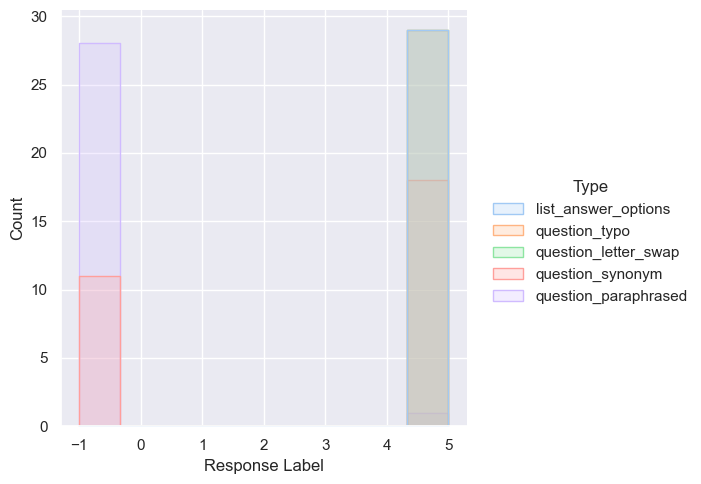

In [ ]:
bar = sns.displot(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q37") & (test_interviews_gemini["non_bias_perturbation"]== 1)], 
                  x="Response Label", hue="Type", element="step")

### Q210: Joining Boycotts 

Question: Political action: joining in boycotts Now Ia like you to look at this card. Ia going to read out some different forms of political action that people can take, and Ia like you to tell me, for each one, whether you have actually done any of these things, whether you might do it or would never, under any circumstances, do it. Joining in boycotts

Answer options: '1=Have done ', '2=Might do ', '3=Would never do', "-1=Don't know"


In [ ]:
# Frequency table for non-bias perturbations

# Group by 'Type' and 'response_label', then count the occurrences
freq_table = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q210") & (test_interviews_gemini["non_bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label              -1         2
Type                                    
list_answer_options   0.000000  1.000000
question_letter_swap  0.642857  0.357143
question_paraphrased  0.250000  0.750000
question_synonym      0.892857  0.107143
question_typo         0.071429  0.928571


In [ ]:
# Frequency table for bias perturbations

# Group by 'Type' and 'response_label', then count the occurrences
freq_table = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q210") & (test_interviews_gemini["bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label                  1    2    3
Type                                       
list_answer_no_middle         0.0  0.0  1.0
list_answer_no_refusal        0.0  1.0  0.0
list_answer_options           0.0  1.0  0.0
list_answer_options_reversed  1.0  0.0  0.0


In [ ]:
# Frequency table for non-bias perturbations

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q210")].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)
n_obs = len(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q210")])
# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print("Number of observations: ", n_obs, "\n", relative_freq_table)

Number of observations:  224 
 Response Label                      -1    1         2    3
Type                                                      
list_answer_no_middle         0.000000  0.0  0.000000  1.0
list_answer_no_refusal        0.000000  0.0  1.000000  0.0
list_answer_options           0.000000  0.0  1.000000  0.0
list_answer_options_reversed  0.000000  1.0  0.000000  0.0
question_letter_swap          0.642857  0.0  0.357143  0.0
question_paraphrased          0.250000  0.0  0.750000  0.0
question_synonym              0.892857  0.0  0.107143  0.0
question_typo                 0.071429  0.0  0.928571  0.0


#### Wilcoxon-Mann-Whitney test
The Wilcoxon-Mann-Whitney test is a non-parametric analog to the independent samples t-test and can be used when you do not assume that the dependent variable is a normally distributed interval variable (you only assume that the variable is at least ordinal)

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q210") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q210") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.mannwhitneyu(baseline, test_against)[0]
    pval = round(sci.stats.mannwhitneyu(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,392.0,1.0000
1,list_answer_no_middle,0.0,0.0000
2,list_answer_options_reversed,784.0,0.0000
3,question_typo,420.0,0.1610
4,question_letter_swap,644.0,0.0000
5,question_synonym,742.0,0.0000
6,question_paraphrased,490.0,0.0053


#### t-test

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q210") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q210") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.ttest_ind(baseline, test_against)[0]
    pval = round(sci.stats.ttest_ind(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

c:\Users\ruppr\OneDrive - Universität Mannheim\Master thesis\HuBiLa\hubila\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,NaN,NaN
1,list_answer_no_middle,-inf,0.0000
2,list_answer_options_reversed,inf,0.0000
3,question_typo,1.441153,0.1553
4,question_letter_swap,6.971370,0.0000
5,question_synonym,15.000000,0.0000
6,question_paraphrased,3.000000,0.0041


#### Chi squared - test 

Pearson’s Chi-Square is a statistical hypothesis test for independence between categorical variables.

In [ ]:
baseline = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q210") & (test_interviews_gemini["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q210") & (test_interviews_gemini["Type"]== i)]["Response Label"].array
    try:
        test_statistic = sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[0]
        pval = round(sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[1],4)
    except: 
        test_statistic = np.nan
        pval = np.nan
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,0.0,1.0
1,list_answer_no_middle,NaN,NaN
2,list_answer_options_reversed,NaN,NaN
3,question_typo,NaN,NaN
4,question_letter_swap,NaN,NaN
5,question_synonym,112.5,0.0
6,question_paraphrased,NaN,NaN


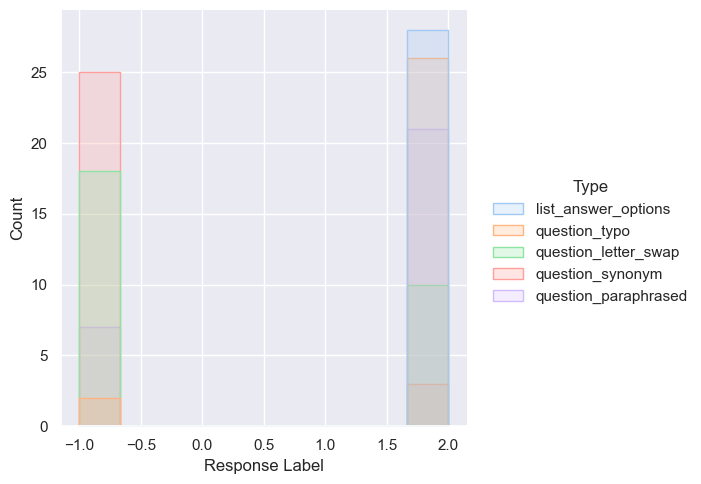

In [ ]:
bar = sns.displot(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q210") & (test_interviews_gemini["non_bias_perturbation"]== 1)], 
                  x="Response Label", hue="Type", element="step")


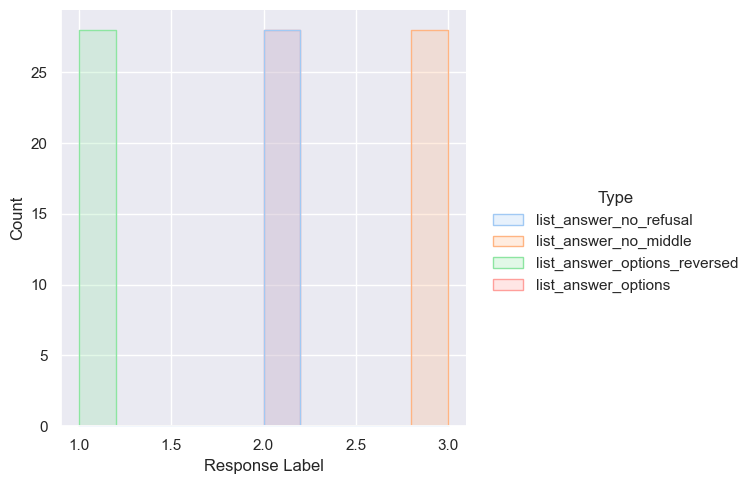

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

bar = sns.displot(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q210") & (test_interviews_gemini["bias_perturbation"]== 1)], 
                  x="Response Label", hue="Type", element="step")


In [ ]:
test_interviews_gemini["question_ID"].unique()

array(['Q6', 'Q37', 'Q63', 'Q71', 'Q97', 'Q142', 'Q182', 'Q210', 'Q228',
       'Q242'], dtype=object)

In [ ]:
# Frequency table for bias perturbations
print(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q71") & (test_interviews_gemini["Type"]== "list_answer_options")]["question"].unique())
print(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q71") & (test_interviews_gemini["Type"]== "list_answer_options")]["answer_options"].unique())

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_gemini[test_interviews_gemini["question_ID"]== "Q71"].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

['Confidence: The Government I am going to name a number of organizations. For each one, could you tell me how much confidence you have in them: is it a great deal of confidence, quite a lot of confidence, not very much confidence or none at all? The governmentin your nationa capital']
['[\'1=A great deal \', \'2=Quite a lot \', \'3=Not very much \', \'4=None at all\', "-1=Don\'t know"]']
Response Label                      -1         1         2    3
Type                                                           
list_answer_no_middle         0.000000  0.000000  0.000000  1.0
list_answer_no_refusal        0.000000  0.000000  0.000000  1.0
list_answer_options           1.000000  0.000000  0.000000  0.0
list_answer_options_reversed  0.034483  0.931034  0.034483  0.0
question_letter_swap          1.000000  0.000000  0.000000  0.0
question_paraphrased          1.000000  0.000000  0.000000  0.0
question_synonym              1.000000  0.000000  0.000000  0.0
question_typo                 1.

In [ ]:
# Frequency table for bias perturbations
print(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q63") & (test_interviews_gemini["Type"]== "list_answer_options")]["question"].unique())
print(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q63") & (test_interviews_gemini["Type"]== "list_answer_options")]["answer_options"].unique())

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_gemini[test_interviews_gemini["question_ID"]== "Q63"].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

['Trust: People of another nationality Ia like to ask you how much you trust people from various groups. Could you tell me for each whether you trust people from this group completely, somewhat, not very much or not at all? People of another nationality']
['[\'1=Trust completely \', \'2=Trust somewhat \', \'3=Do not trust very much \', \'4=Do not trust at all\', "-1=Don\'t know"]']
Response Label                      -1         2
Type                                            
list_answer_no_middle         0.000000  1.000000
list_answer_no_refusal        0.000000  1.000000
list_answer_options           1.000000  0.000000
list_answer_options_reversed  0.793103  0.206897
question_letter_swap          1.000000  0.000000
question_paraphrased          0.379310  0.620690
question_synonym              1.000000  0.000000
question_typo                 1.000000  0.000000


In [ ]:
# Frequency table for bias perturbations
print(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q228") & (test_interviews_gemini["Type"]== "list_answer_options")]["question"].unique())
print(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q228") & (test_interviews_gemini["Type"]== "list_answer_options")]["answer_options"].unique())

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_gemini[test_interviews_gemini["question_ID"]== "Q228"].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

['How often in countryselections: Journalists provide fair coverage of elections In your view, how often do the following things occur in this countryselections? Journalists provide fair coverage of elections']
['[\'1=Very often \', \'2=Fairly often \', \'3=Not often \', \'4=Not at all often\', "-1=Don\'t know"]']
Response Label                 -1    2    3
Type                                       
list_answer_no_middle         0.0  0.0  1.0
list_answer_no_refusal        0.0  0.0  1.0
list_answer_options           1.0  0.0  0.0
list_answer_options_reversed  0.0  1.0  0.0
question_letter_swap          1.0  0.0  0.0
question_paraphrased          1.0  0.0  0.0
question_synonym              1.0  0.0  0.0
question_typo                 1.0  0.0  0.0


In [ ]:
# Frequency table for bias perturbations
print(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q242") & (test_interviews_gemini["Type"]== "list_answer_options")]["question"].unique())
print(test_interviews_gemini[(test_interviews_gemini["question_ID"]== "Q242") & (test_interviews_gemini["Type"]== "list_answer_options")]["answer_options"].unique())

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_gemini[test_interviews_gemini["question_ID"]== "Q242"].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

['Democracy: Religious authorities interpret the laws Please tell me for each of the following things how essential you think it is as a characteristic of democracy. Use this scale where a meansnot at all an essential characteristic of democracyand of means it definitely isan essential characteristic of democracy. Religious authorities interpret the laws']
['[\'1=Not an essential feature \', \'2 \', \'3 \', \'4 \', \'5 \', \'6 \', \'7 \', \'8 \', \'9 \', \'10=Essential feature\', "-1=Don\'t know"]']
Response Label                  1
Type                             
list_answer_no_middle         1.0
list_answer_no_refusal        1.0
list_answer_options           1.0
list_answer_options_reversed  1.0
question_letter_swap          1.0
question_paraphrased          1.0
question_synonym              1.0
question_typo                 1.0


In [ ]:
### Response label comparison (Opinion Floating)
# Group by 'Type' and 'Response Label', then count the occurrences
freq_table = test_interviews_gemini[#(gemini_tmp00["question_ID"]== "Q37") &
                          (test_interviews_gemini["Type"] == "list_answer_options") |
                          #(gemini_tmp00["question_ID"]== "Q37") &
                          (test_interviews_gemini["Type"] == "list_answer_no_refusal")].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = round(freq_table.div(freq_table.sum(axis=1), axis=0), 3)

# Display the relative frequency table
print(relative_freq_table)
print(relative_freq_table.to_latex())

Response Label            -1      0      1      2      3      4      5      10
Type                                                                          
list_answer_no_refusal  0.000  0.111  0.107  0.218  0.397  0.076  0.034  0.057
list_answer_options     0.502  0.102  0.098  0.098  0.098  0.000  0.102  0.000
\begin{tabular}{lrrrrrrrr}
\toprule
Response Label & -1 & 0 & 1 & 2 & 3 & 4 & 5 & 10 \\
Type &  &  &  &  &  &  &  &  \\
\midrule
list_answer_no_refusal & 0.000000 & 0.111000 & 0.107000 & 0.218000 & 0.397000 & 0.076000 & 0.034000 & 0.057000 \\
list_answer_options & 0.502000 & 0.102000 & 0.098000 & 0.098000 & 0.098000 & 0.000000 & 0.102000 & 0.000000 \\
\bottomrule
\end{tabular}



## Mistral Analysis

In [ ]:
# Gemini Test Interviews
test_interviews_mistral = test_interviews_processed[test_interviews_processed["model_name"] == "Mistral-7B-Instruct-v0.3"] 

# Every unsuccessful interview is excluded, tested by two len()-comparisons
print("Length of test dataframe before cleaning NULL: ", len(test_interviews_mistral))
test_interviews_mistral= test_interviews_mistral[test_interviews_mistral["Response Label"].notnull()]
print("Length of test dataframe after cleaning NULL: ", len(test_interviews_mistral))

# convert response_label column to integers
test_interviews_mistral["Response Label"] = test_interviews_mistral["Response Label"].astype(int)

Length of test dataframe before cleaning NULL:  1280
Length of test dataframe after cleaning NULL:  1280


### Q142: Worry loosing my job or finding new job

Question: Worries: Losing my job or not finding a job To what degree are you worried about the following situations? Losing my job or not finding a job

Answer options: ['1=Very much ', '2=A good deal ', '3=Not much ', '4=Not at all', "-1=Don't know"]

In [ ]:
# Frequency table for non-bias perturbations

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q142") & (test_interviews_mistral["non_bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the absolut &  relative frequency table
print("Relative frequencies: ", relative_freq_table)

print("\n Absolut frequencies: ", freq_table)

Relative frequencies:  Response Label               1         3
Type                                    
list_answer_options   0.058824  0.941176
question_letter_swap  1.000000  0.000000
question_paraphrased  1.000000  0.000000
question_synonym      1.000000  0.000000
question_typo         1.000000  0.000000

 Absolut frequencies:  Response Label         1   3
Type                        
list_answer_options    1  16
question_letter_swap  17   0
question_paraphrased  17   0
question_synonym      17   0
question_typo         17   0


In [ ]:
# Frequency table for bias perturbations

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q142") & (test_interviews_mistral["bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the absolut &  relative frequency table
print("Relative frequencies: ", relative_freq_table)

print("Absolut frequencies: ", freq_table)

Relative frequencies:  Response Label                       1         3         4
Type                                                      
list_answer_no_middle         1.000000  0.000000  0.000000
list_answer_no_refusal        1.000000  0.000000  0.000000
list_answer_options           0.058824  0.941176  0.000000
list_answer_options_reversed  0.058824  0.000000  0.941176
Absolut frequencies:  Response Label                 1   3   4
Type                                    
list_answer_no_middle         17   0   0
list_answer_no_refusal        17   0   0
list_answer_options            1  16   0
list_answer_options_reversed   1   0  16


#### Wilcoxon-Mann-Whitney test
The Wilcoxon-Mann-Whitney test is a non-parametric analog to the independent samples t-test and can be used when you do not assume that the dependent variable is a normally distributed interval variable (you only assume that the variable is at least ordinal)

In [ ]:
baseline = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q142") & (test_interviews_mistral["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q142") & (test_interviews_mistral["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.mannwhitneyu(baseline, test_against)[0]
    pval = round(sci.stats.mannwhitneyu(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,280.5,0.0
1,list_answer_no_middle,280.5,0.0
2,list_answer_options_reversed,16.5,0.0
3,question_typo,280.5,0.0
4,question_letter_swap,280.5,0.0
5,question_synonym,280.5,0.0
6,question_paraphrased,280.5,0.0


#### t-test

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [ ]:
baseline = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q142") & (test_interviews_mistral["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q142") & (test_interviews_mistral["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.ttest_ind(baseline, test_against)[0]
    pval = round(sci.stats.ttest_ind(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

c:\Users\ruppr\OneDrive - Universität Mannheim\Master thesis\HuBiLa\hubila\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,16.000000,0.0000
1,list_answer_no_middle,16.000000,0.0000
2,list_answer_options_reversed,-4.437602,0.0001
3,question_typo,16.000000,0.0000
4,question_letter_swap,16.000000,0.0000
5,question_synonym,16.000000,0.0000
6,question_paraphrased,16.000000,0.0000


#### Chi squared - test 

Pearson’s Chi-Square is a statistical hypothesis test for independence between categorical variables.

In [ ]:
baseline = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q142") & (test_interviews_mistral["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q142") & (test_interviews_mistral["Type"]== i)]["Response Label"].array
    try:
        test_statistic = sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[0]
        pval = round(sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[1],4)
    except: 
        test_statistic = np.nan
        pval = np.nan
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,NaN,NaN
1,list_answer_no_middle,NaN,NaN
2,list_answer_options_reversed,NaN,NaN
3,question_typo,NaN,NaN
4,question_letter_swap,NaN,NaN
5,question_synonym,NaN,NaN
6,question_paraphrased,NaN,NaN


### Q242: Religious authorities interpreting laws

Question: Democracy: Religious authorities interpret the laws Please tell me for each of the following things how essential you think it is as a characteristic of democracy. Use this scale where a meansnot at all an essential characteristic of democracyand of means it definitely isan essential characteristic of democracy. Religious authorities interpret the laws

Answer options: ['1=Not an essential feature ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', '10=Essential feature', "-1=Don't know"]

In [ ]:
# Frequency table for non-bias perturbations

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q242") & (test_interviews_mistral["non_bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print("Relative frequencies: ", relative_freq_table)

print("Absolut frequencies: ", freq_table)

Relative frequencies:  Response Label              1         2    5         10
Type                                                   
list_answer_options   0.000000  0.000000  1.0  0.000000
question_letter_swap  1.000000  0.000000  0.0  0.000000
question_paraphrased  0.923077  0.000000  0.0  0.076923
question_synonym      0.923077  0.076923  0.0  0.000000
question_typo         0.923077  0.000000  0.0  0.076923
Absolut frequencies:  Response Label        1   2   5   10
Type                                
list_answer_options    0   0  13   0
question_letter_swap  13   0   0   0
question_paraphrased  12   0   0   1
question_synonym      12   1   0   0
question_typo         12   0   0   1


In [ ]:
# Frequency table for bias perturbations

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q242") & (test_interviews_mistral["bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label                  5         6         7    9
Type                                                      
list_answer_no_middle         0.0  0.923077  0.076923  0.0
list_answer_no_refusal        0.0  0.923077  0.076923  0.0
list_answer_options           1.0  0.000000  0.000000  0.0
list_answer_options_reversed  0.0  0.000000  0.000000  1.0


#### Wilcoxon-Mann-Whitney test
The Wilcoxon-Mann-Whitney test is a non-parametric analog to the independent samples t-test and can be used when you do not assume that the dependent variable is a normally distributed interval variable (you only assume that the variable is at least ordinal)

In [ ]:
baseline = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q242") & (test_interviews_mistral["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q242") & (test_interviews_mistral["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.mannwhitneyu(baseline, test_against)[0]
    pval = round(sci.stats.mannwhitneyu(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,0.0,0.0
1,list_answer_no_middle,0.0,0.0
2,list_answer_options_reversed,0.0,0.0
3,question_typo,156.0,0.0
4,question_letter_swap,169.0,0.0
5,question_synonym,169.0,0.0
6,question_paraphrased,156.0,0.0


#### t-test

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [ ]:
baseline = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q242") & (test_interviews_mistral["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q242") & (test_interviews_mistral["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.ttest_ind(baseline, test_against)[0]
    pval = round(sci.stats.ttest_ind(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

c:\Users\ruppr\OneDrive - Universität Mannheim\Master thesis\HuBiLa\hubila\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,-14.000000,0.0000
1,list_answer_no_middle,-14.000000,0.0000
2,list_answer_options_reversed,-inf,0.0000
3,question_typo,4.777778,0.0001
4,question_letter_swap,inf,0.0000
5,question_synonym,51.000000,0.0000
6,question_paraphrased,4.777778,0.0001


#### Chi squared - test 

Pearson’s Chi-Square is a statistical hypothesis test for independence between categorical variables.

In [ ]:
baseline = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q242") & (test_interviews_mistral["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q242") & (test_interviews_mistral["Type"]== i)]["Response Label"].array
    try:
        test_statistic = sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[0]
        pval = round(sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[1],4)
    except: 
        test_statistic = np.nan
        pval = np.nan
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,NaN,NaN
1,list_answer_no_middle,NaN,NaN
2,list_answer_options_reversed,NaN,NaN
3,question_typo,NaN,NaN
4,question_letter_swap,NaN,NaN
5,question_synonym,NaN,NaN
6,question_paraphrased,NaN,NaN


### Q182: Duty to have children

Question: Justifiable: Homosexuality Please tell me for each of the following statements whether you think it can always be justified, never be justified, or something in between, using this card. Homosexuality

Answer options: ['1=Never justifiable ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', '10=Always justifiable', "-1=Don't know"]

In [ ]:
# Frequency table for non-bias perturbations

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q182") & (test_interviews_mistral["non_bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label              1         2         8         10
Type                                                        
list_answer_options   0.000000  1.000000  0.000000  0.000000
question_letter_swap  0.058824  0.941176  0.000000  0.000000
question_paraphrased  0.058824  0.000000  0.000000  0.941176
question_synonym      1.000000  0.000000  0.000000  0.000000
question_typo         0.000000  0.000000  0.941176  0.058824


In [ ]:
# Frequency table for bias perturbations

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q182") & (test_interviews_mistral["bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label                       1         2    9
Type                                                 
list_answer_no_middle         0.941176  0.058824  0.0
list_answer_no_refusal        0.941176  0.058824  0.0
list_answer_options           0.000000  1.000000  0.0
list_answer_options_reversed  0.000000  0.000000  1.0


### Q37: Duty to have children

Question: Duty towards society to have children Do you agree, disagree or neither agree nor disagree with the following statements? It is a duty towards society to have children

Answer options: ['1=Strongly agree ', '2=Agree ', '3=Neither agree, nor disagree ', '4=Disagree ', '5=Strongly disagree', "-1=Don't know"]

In [ ]:
# Frequency table for non-bias perturbations

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q37") & (test_interviews_mistral["non_bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label               1         2         3
Type                                              
list_answer_options   0.000000  0.058824  0.941176
question_letter_swap  0.058824  0.000000  0.941176
question_paraphrased  0.058824  0.000000  0.941176
question_synonym      0.000000  0.058824  0.941176
question_typo         0.058824  0.000000  0.941176


In [ ]:
# Frequency table for bias perturbations

# Group by 'type' and 'response_label', then count the occurrences
freq_table = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q37") & (test_interviews_mistral["bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label                       1         2         3
Type                                                      
list_answer_no_middle         1.000000  0.000000  0.000000
list_answer_no_refusal        0.058824  0.000000  0.941176
list_answer_options           0.000000  0.058824  0.941176
list_answer_options_reversed  0.000000  0.000000  1.000000


In [ ]:
# Frequency table for non-bias perturbations

# Group by 'Type' and 'Response Label', then count the occurrences
freq_table = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q37")].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)
n_obs = len(test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q37")])
# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

print(relative_freq_table.columns)
relative_freq_table = relative_freq_table.rename(columns={-1: "Don't know",
                                                          1:"Strongly agree",
                                                          2:"2=Agree",
                                                          3: "3=Neither agree, nor disagree",
                                                          4: "4=Disagree",
                                                          5: "5=Strongly disagree"}, 
                                                 index={'list_answer_no_middle': 'Odd-Even Scales',
                                                        "list_answer_no_refusal": "Opinion Floating",
                                                        "list_answer_options": "Original",
                                                        "list_answer_options_reversed": "Response Order",
                                                        "question_letter_swap": "Letter Swap",
                                                        "question_paraphrased": "Paraphrase",
                                                        "question_synonym": "Synonym",
                                                        "question_typo": "Typo"
                                                        })
# Display the relative frequency table
print("Number of observations: ", n_obs, "\n", relative_freq_table)

Index([1, 2, 3], dtype='int32', name='Response Label')
Number of observations:  136 
 Response Label    Strongly agree   2=Agree  3=Neither agree, nor disagree
Type                                                                     
Odd-Even Scales         1.000000  0.000000                       0.000000
Opinion Floating        0.058824  0.000000                       0.941176
Original                0.000000  0.058824                       0.941176
Response Order          0.000000  0.000000                       1.000000
Letter Swap             0.058824  0.000000                       0.941176
Paraphrase              0.058824  0.000000                       0.941176
Synonym                 0.000000  0.058824                       0.941176
Typo                    0.058824  0.000000                       0.941176


In [ ]:
print(relative_freq_table.to_latex())

\begin{tabular}{lrrr}
\toprule
Response Label & Strongly agree & 2=Agree & 3=Neither agree, nor disagree \\
Type &  &  &  \\
\midrule
Odd-Even Scales & 1.000000 & 0.000000 & 0.000000 \\
Opinion Floating & 0.058824 & 0.000000 & 0.941176 \\
Original & 0.000000 & 0.058824 & 0.941176 \\
Response Order & 0.000000 & 0.000000 & 1.000000 \\
Letter Swap & 0.058824 & 0.000000 & 0.941176 \\
Paraphrase & 0.058824 & 0.000000 & 0.941176 \\
Synonym & 0.000000 & 0.058824 & 0.941176 \\
Typo & 0.058824 & 0.000000 & 0.941176 \\
\bottomrule
\end{tabular}



#### Wilcoxon-Mann-Whitney test
The Wilcoxon-Mann-Whitney test is a non-parametric analog to the independent samples t-test and can be used when you do not assume that the dependent variable is a normally distributed interval variable (you only assume that the variable is at least ordinal)

In [ ]:
baseline = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q37") & (test_interviews_mistral["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q37") & (test_interviews_mistral["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.mannwhitneyu(baseline, test_against)[0]
    pval = round(sci.stats.mannwhitneyu(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,145.0,1.0000
1,list_answer_no_middle,289.0,0.0000
2,list_answer_options_reversed,136.0,0.3466
3,question_typo,145.0,1.0000
4,question_letter_swap,145.0,1.0000
5,question_synonym,144.5,1.0000
6,question_paraphrased,145.0,1.0000


In [ ]:
print(test_results.to_latex())

\begin{tabular}{llrr}
\toprule
 & Original tested against & Test Statistic & p-value \\
\midrule
0 & list_answer_no_refusal & 145.000000 & 1.000000 \\
1 & list_answer_no_middle & 289.000000 & 0.000000 \\
2 & list_answer_options_reversed & 136.000000 & 0.346600 \\
3 & question_typo & 145.000000 & 1.000000 \\
4 & question_letter_swap & 145.000000 & 1.000000 \\
5 & question_synonym & 144.500000 & 1.000000 \\
6 & question_paraphrased & 145.000000 & 1.000000 \\
\bottomrule
\end{tabular}



#### t-test

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [ ]:
baseline = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q37") & (test_interviews_mistral["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q37") & (test_interviews_mistral["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.ttest_ind(baseline, test_against)[0]
    pval = round(sci.stats.ttest_ind(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results = test_results.rename(index={'list_answer_no_middle': 'Odd-Even Scales',
                                                        "list_answer_no_refusal": "Opinion Floating",
                                                        "list_answer_options": "Original",
                                                        "list_answer_options_reversed": "Response Order",
                                                        "question_letter_swap": "Letter Swap",
                                                        "question_paraphrased": "Paraphrase",
                                                        "question_synonym": "Synonym",
                                                        "question_typo": "Typo"
                                                        })
test_results

c:\Users\ruppr\OneDrive - Universität Mannheim\Master thesis\HuBiLa\hubila\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,0.447214,0.6577
1,list_answer_no_middle,33.000000,0.0000
2,list_answer_options_reversed,-1.000000,0.3248
3,question_typo,0.447214,0.6577
4,question_letter_swap,0.447214,0.6577
5,question_synonym,0.000000,1.0000
6,question_paraphrased,0.447214,0.6577


In [ ]:
print(test_results.to_latex())

\begin{tabular}{llrr}
\toprule
 & Original tested against & Test Statistic & p-value \\
\midrule
0 & list_answer_no_refusal & 0.447214 & 0.657700 \\
1 & list_answer_no_middle & 33.000000 & 0.000000 \\
2 & list_answer_options_reversed & -1.000000 & 0.324800 \\
3 & question_typo & 0.447214 & 0.657700 \\
4 & question_letter_swap & 0.447214 & 0.657700 \\
5 & question_synonym & 0.000000 & 1.000000 \\
6 & question_paraphrased & 0.447214 & 0.657700 \\
\bottomrule
\end{tabular}



#### Chi squared - test 

Pearson’s Chi-Square is a statistical hypothesis test for independence between categorical variables.

In [ ]:
baseline = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q37") & (test_interviews_mistral["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q37") & (test_interviews_mistral["Type"]== i)]["Response Label"].array
    try:
        test_statistic = sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[0]
        pval = round(sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[1],4)
    except: 
        test_statistic = np.nan
        pval = np.nan
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,NaN,NaN
1,list_answer_no_middle,NaN,NaN
2,list_answer_options_reversed,NaN,NaN
3,question_typo,NaN,NaN
4,question_letter_swap,NaN,NaN
5,question_synonym,0.0,1.0
6,question_paraphrased,NaN,NaN


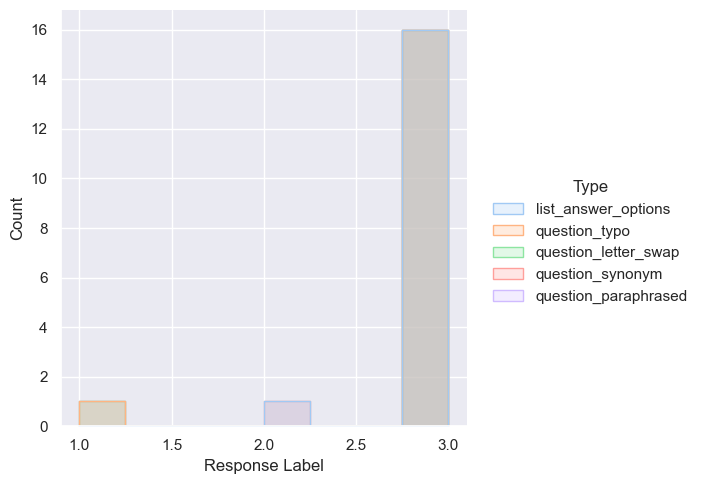

In [ ]:
bar = sns.displot(test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q37") & (test_interviews_mistral["non_bias_perturbation"]== 1)], 
                  x="Response Label", hue="Type", element="step")

### Q210: Joining Boycotts 

Question: Political action: joining in boycotts Now Ia like you to look at this card. Ia going to read out some different forms of political action that people can take, and Ia like you to tell me, for each one, whether you have actually done any of these things, whether you might do it or would never, under any circumstances, do it. Joining in boycotts

Answer options: '1=Have done ', '2=Might do ', '3=Would never do', "-1=Don't know"


In [ ]:
# Frequency table for non-bias perturbations

# Group by 'Type' and 'response_label', then count the occurrences
freq_table = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q210") & (test_interviews_mistral["non_bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label               1         2
Type                                    
list_answer_options   1.000000  0.000000
question_letter_swap  0.923077  0.076923
question_paraphrased  1.000000  0.000000
question_synonym      0.000000  1.000000
question_typo         0.076923  0.923077


In [ ]:
# Frequency table for bias perturbations

# Group by 'Type' and 'response_label', then count the occurrences
freq_table = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q210") & (test_interviews_mistral["bias_perturbation"]== 1)].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = freq_table.div(freq_table.sum(axis=1), axis=0)

# Display the relative frequency table
print(relative_freq_table)

Response Label                  1    2
Type                                  
list_answer_no_middle         1.0  0.0
list_answer_no_refusal        1.0  0.0
list_answer_options           1.0  0.0
list_answer_options_reversed  0.0  1.0


#### Wilcoxon-Mann-Whitney test
The Wilcoxon-Mann-Whitney test is a non-parametric analog to the independent samples t-test and can be used when you do not assume that the dependent variable is a normally distributed interval variable (you only assume that the variable is at least ordinal)

In [ ]:
baseline = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q210") & (test_interviews_mistral["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q210") & (test_interviews_mistral["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.mannwhitneyu(baseline, test_against)[0]
    pval = round(sci.stats.mannwhitneyu(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,144.5,1.0000
1,list_answer_no_middle,144.5,1.0000
2,list_answer_options_reversed,0.0,0.0000
3,question_typo,8.5,0.0000
4,question_letter_swap,102.0,0.2818
5,question_synonym,0.0,0.0000
6,question_paraphrased,110.5,1.0000


#### t-test

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [ ]:
baseline = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q210") & (test_interviews_mistral["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q210") & (test_interviews_mistral["Type"]== i)]["Response Label"].array
    test_statistic = sci.stats.ttest_ind(baseline, test_against)[0]
    pval = round(sci.stats.ttest_ind(baseline, test_against)[1],4)
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

c:\Users\ruppr\OneDrive - Universität Mannheim\Master thesis\HuBiLa\hubila\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,NaN,NaN
1,list_answer_no_middle,NaN,NaN
2,list_answer_options_reversed,-inf,0.0000
3,question_typo,-13.798551,0.0000
4,question_letter_swap,-1.149879,0.2599
5,question_synonym,-inf,0.0000
6,question_paraphrased,NaN,NaN


#### Chi squared - test 

Pearson’s Chi-Square is a statistical hypothesis test for independence between categorical variables.

In [ ]:
baseline = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q210") & (test_interviews_mistral["Type"]== "list_answer_options")]["Response Label"].array

test_results = []

for i in all_perturbation_columns:
    test_against = test_interviews_mistral[(test_interviews_mistral["question_ID"]== "Q210") & (test_interviews_mistral["Type"]== i)]["Response Label"].array
    try:
        test_statistic = sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[0]
        pval = round(sci.stats.chisquare(f_exp=baseline, f_obs=test_against)[1],4)
    except: 
        test_statistic = np.nan
        pval = np.nan
    test_result = [i, test_statistic, pval]
    test_results.append(test_result)

column_names = ["Original tested against", "Test Statistic", "p-value"]
test_results = pd.DataFrame(test_results, columns=column_names)
test_results

,Original tested against,Test Statistic,p-value
0,list_answer_no_refusal,0.0,1.0
1,list_answer_no_middle,0.0,1.0
2,list_answer_options_reversed,NaN,NaN
3,question_typo,NaN,NaN
4,question_letter_swap,NaN,NaN
5,question_synonym,NaN,NaN
6,question_paraphrased,NaN,NaN


### Response label comparison (Opinion Floating)

In [ ]:
# Group by 'Type' and 'Response Label', then count the occurrences
freq_table = test_interviews_mistral[#(gemini_tmp00["question_ID"]== "Q37") &
                          (test_interviews_mistral["Type"] == "list_answer_options") |
                          #(gemini_tmp00["question_ID"]== "Q37") &
                          (test_interviews_mistral["Type"] == "list_answer_no_refusal")].groupby(['Type', 'Response Label']).size().unstack(fill_value=0)

# Convert absolute frequencies to relative frequencies by normalizing
relative_freq_table = round(freq_table.div(freq_table.sum(axis=1), axis=0),3)

# Display the relative frequency table
print(relative_freq_table)
print(relative_freq_table.to_latex())

Response Label              1      2      3     5      6      7
Type                                                           
list_answer_no_refusal  0.642  0.179  0.099  0.00  0.074  0.006
list_answer_options     0.531  0.191  0.198  0.08  0.000  0.000
\begin{tabular}{lrrrrrr}
\toprule
Response Label & 1 & 2 & 3 & 5 & 6 & 7 \\
Type &  &  &  &  &  &  \\
\midrule
list_answer_no_refusal & 0.642000 & 0.179000 & 0.099000 & 0.000000 & 0.074000 & 0.006000 \\
list_answer_options & 0.531000 & 0.191000 & 0.198000 & 0.080000 & 0.000000 & 0.000000 \\
\bottomrule
\end{tabular}

